In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
movies_data=pd.read_csv("my_movies.csv")
movies_data=movies_data.iloc[:,5:]
movies_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


<ipython-input-6-797b0e43fd4f>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')


Text(0, 0.5, 'support')

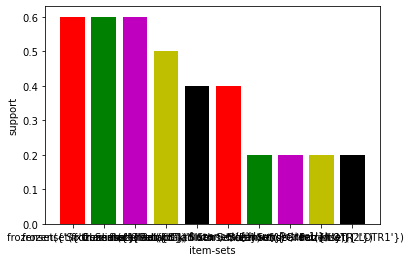

In [6]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(movies_data,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk')
plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets')
plt.ylabel('support')

In [7]:
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [8]:
def to_list(i):
    return (sorted(list(i)))

In [9]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [10]:
ma_X = ma_X.apply(sorted)

In [11]:
rules_sets = list(ma_X)

In [12]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [13]:
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [14]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [16]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
86,"(Green Mile, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
114,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
48,"(Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
12,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
118,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
32,"(Harry Potter1, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
60,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
16,"(Harry Potter1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
